In [6]:
import numpy as np
import sympy
from matplotlib import pyplot as plt
alpha = .01

In [4]:
# Utility Functions

# polynomial model
def general_model(theta, x):
    '''
        h(x) = w0 + w1*x
        h(x) = w0 + w1*x + w2*x**2
        ...
    '''
    ret = 0
    
    for i in range(len(theta)):
        ret += (theta[i] * (x**i))
    
    return ret

# gradient function (for linear model)
## This is my modified gradient descent algorithm to accomodate standard deviation for error distribution

def gradient(theta, sd, data):
    '''
        Inputs: theta = [w0, w1, ..., wn]
            data = [[x_data], [y_data]]
        Outputs: value of the gradient at theta = (w0, w1)
    '''
    
    x = data[0]
    y = data[1]
    
    grad = [0 for i in theta]
    c = 0
    
    n = len(data[0])
    
    for i in range(n):
        temp = general_model(theta, x[i]) - y[i]
        c += temp**2
        for j in range(len(grad)):
            grad[j] += (temp * (x[i]**j)) 
            
    for i in range(len(grad)):
        grad[i] = grad[i] / n
    
    c = (-n/sd) + (1/(sd**3))* c
    
    return grad, c

def gradient_descent(theta, sd, iterations, data):
    '''
        Inputs:
            theta = [w0, w1, ..., wn]
            iterations (# number of iterations)
        Outputs:
            updated theta = [w0, w1, ..., wn]
    '''
    
    
    for i in range(iterations):
        grad, sd_2 = gradient(theta, sd, data)
        for j in range(len(theta)):
            theta[j] -= (alpha * grad[j])
        sd -= sd_2
    
    return theta, sd

In [13]:
'''
Problem 5: he mean height and weight of boys ages 2-11 were collected in the U.S.
National Health and Nutrition Examination Survey by the Centers for Disease Control (CDC) in
2002, resulting in the following table. Apply MLE to determine the model y = w0 + w1x + w2x2 + E
with x being the height, y being the weight and E ∼ N (0, σ2). Find an estimate of σ. Attach you
code.
'''
 
height = [.912, .986, 1.06, 1.13, 1.19, 1.26, 1.32, 1.38, 1.41, 1.49]  # (meters)
weight = [13.7, 15.9, 18.5, 21.3, 23.5, 27.2, 32.7, 36, 38.6, 43.7]    # (kgs)

Result ---> ([w0, w1, w2], sd) =  ([-0.5533595598494462, -9.621437096096352, 26.115627448210265], 1999.9504271147675)


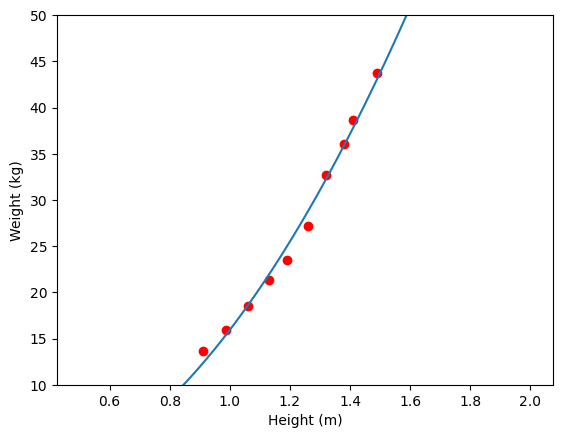

In [21]:
data = [height, weight]
plt.scatter(height, weight, c="red")
plt.xlabel("Height (m)")
plt.ylabel("Weight (kg)")
plt.ylim(10, 50)

theta_guess = [10, 10, 10]
sd_guess = 10
iterations = 200000

g = gradient_descent(theta_guess, sd_guess, iterations, data)
w0 = g[0][0]
w1 = g[0][1]
w2 = g[0][2]
sd = g[1]
print(f"Result ---> ([w0, w1, w2], sd) =  {g}")
z = np.linspace(0.5, 2, 1000)

v = w0 + w1*z + w2*(z**2)

plt.plot(z, v)
plt.show()